# The Perceptron Algorithm

This notebook illustrates the training of the perceptron algorithm, step by step, to solve the logical functions AND, OR and NOT. These are summarized below: 

| A    | B    |  A AND B  |  A OR B | NOT A|
|------|------|-----      |-----    |----- |
|  0   |  0   | 0         | 0       | 1    |
|  0   |  1   | 0         | 1       | 1    |
|  1   |  0   | 0         | 1       | 0    |
|  1   |  1   | 1         | 1       | 0    |

In [1]:
import numpy as np

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
plt.rcParams['figure.figsize'] = [10, 10]

Let us first code the inputs A,B of the table properly:

In [2]:
X = np.ndarray(shape=(4,2), dtype=int)
X[0,0] = 0
X[0,1] = 0
X[1,0] = 0
X[1,1] = 1
X[2,0] = 1
X[2,1] = 0
X[3,0] = 1
X[3,1] = 1

and define two functions that will implement the perceptron algorithm that we saw in the course. The function perceptron_update evaluates if $\mathbf{w}^T\mathbf{x}*y <0$ and if it is, it updates the weights accordingly, given one sample.

The second function perceptron_algorithm implements the two outer loops of the algorithm (see slides).

Please note that in this implementation the bias $b$ is separated and not represented in the usual matrix form.

In [3]:
def perceptron_update(x,y,w,b):
    '''Function implemented by a perceptron with weight vector w and bias b'''
    
    counter = 0
    error = (np.dot(w,x) + b)*y
    print('--> with activation: y*(dot(W,x) +b) = ',  y,'*( dot(', w, ',', x,') + ', b, ')=', error)
    if (np.dot(w,x) + b)*y <= 0:
        w = w + y*x
        b = b + y
        counter = 1
        print('--> Updated weights: ', w, ' and bias ', b)
    else:
        print('--> Activation positive: No updates')
    return w, b, counter

def perceptron_algorithm(X,y,W,b):
    '''Aux function that implements the perceptron algorithm as seen in the course'''
    
    iteration = 1
    print("Initial weights (W,b): (", W, ',', b, ")")
    while True:
        m = 0
        print("*************** Iteration No: ", iteration, "************************")
        for i in range(0,len(X)):
            print("Sample", i, " (x,y): (", X[i,:],',', y[i], ')')
            W, b, error = perceptron_update(X[i,:],y[i], W, b)
            m += error
        iteration +=1   
        if m == 0:
            break
            
    return W,b

### OR function
Let us randomly assign values $\mathbf{W}=[0,1]$ and $b=0.5$ for initialization and then run the algorithm.

In [4]:
#OR output
y_OR = [-1,1,1,1] 

#initialization
W = [0, 1]
b = 0.5

#Solve
[W_final, b_final] = perceptron_algorithm(X,y_OR,W,b)
print('Solution(W,b) : (', W_final, b_final, ')')

Initial weights (W,b): ( [0, 1] , 0.5 )
*************** Iteration No:  1 ************************
Sample 0  (x,y): ( [0 0] , -1 )
--> with activation: y*(dot(W,x) +b) =  -1 *( dot( [0, 1] , [0 0] ) +  0.5 )= -0.5
--> Updated weights:  [0 1]  and bias  -0.5
Sample 1  (x,y): ( [0 1] , 1 )
--> with activation: y*(dot(W,x) +b) =  1 *( dot( [0 1] , [0 1] ) +  -0.5 )= 0.5
--> Activation positive: No updates
Sample 2  (x,y): ( [1 0] , 1 )
--> with activation: y*(dot(W,x) +b) =  1 *( dot( [0 1] , [1 0] ) +  -0.5 )= -0.5
--> Updated weights:  [1 1]  and bias  0.5
Sample 3  (x,y): ( [1 1] , 1 )
--> with activation: y*(dot(W,x) +b) =  1 *( dot( [1 1] , [1 1] ) +  0.5 )= 2.5
--> Activation positive: No updates
*************** Iteration No:  2 ************************
Sample 0  (x,y): ( [0 0] , -1 )
--> with activation: y*(dot(W,x) +b) =  -1 *( dot( [1 1] , [0 0] ) +  0.5 )= -0.5
--> Updated weights:  [1 1]  and bias  -0.5
Sample 1  (x,y): ( [0 1] , 1 )
--> with activation: y*(dot(W,x) +b) =  1 *( 


#### Initialization: 
What if we change the initalize the weights differently? For example,

$\mathbf{W}=[0.5,0.5]$ and $b=1$

In [5]:
W = [0.5, 0.5]
b = 1

[W_2, b_2] = perceptron_algorithm(X,y_OR,W,b)
print('Solution(W,b) : (', W_2, b_2, ')')

Initial weights (W,b): ( [0.5, 0.5] , 1 )
*************** Iteration No:  1 ************************
Sample 0  (x,y): ( [0 0] , -1 )
--> with activation: y*(dot(W,x) +b) =  -1 *( dot( [0.5, 0.5] , [0 0] ) +  1 )= -1.0
--> Updated weights:  [0.5 0.5]  and bias  0
Sample 1  (x,y): ( [0 1] , 1 )
--> with activation: y*(dot(W,x) +b) =  1 *( dot( [0.5 0.5] , [0 1] ) +  0 )= 0.5
--> Activation positive: No updates
Sample 2  (x,y): ( [1 0] , 1 )
--> with activation: y*(dot(W,x) +b) =  1 *( dot( [0.5 0.5] , [1 0] ) +  0 )= 0.5
--> Activation positive: No updates
Sample 3  (x,y): ( [1 1] , 1 )
--> with activation: y*(dot(W,x) +b) =  1 *( dot( [0.5 0.5] , [1 1] ) +  0 )= 1.0
--> Activation positive: No updates
*************** Iteration No:  2 ************************
Sample 0  (x,y): ( [0 0] , -1 )
--> with activation: y*(dot(W,x) +b) =  -1 *( dot( [0.5 0.5] , [0 0] ) +  0 )= -0.0
--> Updated weights:  [0.5 0.5]  and bias  -1
Sample 1  (x,y): ( [0 1] , 1 )
--> with activation: y*(dot(W,x) +b) =  

In [6]:
W = [3, 1]
b = 0.2

[W_3, b_3] = perceptron_algorithm(X,y_OR,W,b)
print('Solution(W,b) : (', W_3, b_3, ')')

Initial weights (W,b): ( [3, 1] , 0.2 )
*************** Iteration No:  1 ************************
Sample 0  (x,y): ( [0 0] , -1 )
--> with activation: y*(dot(W,x) +b) =  -1 *( dot( [3, 1] , [0 0] ) +  0.2 )= -0.2
--> Updated weights:  [3 1]  and bias  -0.8
Sample 1  (x,y): ( [0 1] , 1 )
--> with activation: y*(dot(W,x) +b) =  1 *( dot( [3 1] , [0 1] ) +  -0.8 )= 0.19999999999999996
--> Activation positive: No updates
Sample 2  (x,y): ( [1 0] , 1 )
--> with activation: y*(dot(W,x) +b) =  1 *( dot( [3 1] , [1 0] ) +  -0.8 )= 2.2
--> Activation positive: No updates
Sample 3  (x,y): ( [1 1] , 1 )
--> with activation: y*(dot(W,x) +b) =  1 *( dot( [3 1] , [1 1] ) +  -0.8 )= 3.2
--> Activation positive: No updates
*************** Iteration No:  2 ************************
Sample 0  (x,y): ( [0 0] , -1 )
--> with activation: y*(dot(W,x) +b) =  -1 *( dot( [3 1] , [0 0] ) +  -0.8 )= 0.8
--> Activation positive: No updates
Sample 1  (x,y): ( [0 1] , 1 )
--> with activation: y*(dot(W,x) +b) =  1 *(

It seems that the final weights vary depending on the initialization. Let us plot the different resulting boundaries.

In [7]:
def get_x1_boundary(W,b,x2):
    '''Auxiliaty function to get points from the decision boundary. 
    Recall the boundary is at w^Tx + b = 0'''
    x1= -(W[1]*x2+b)/W[0]
    return x1

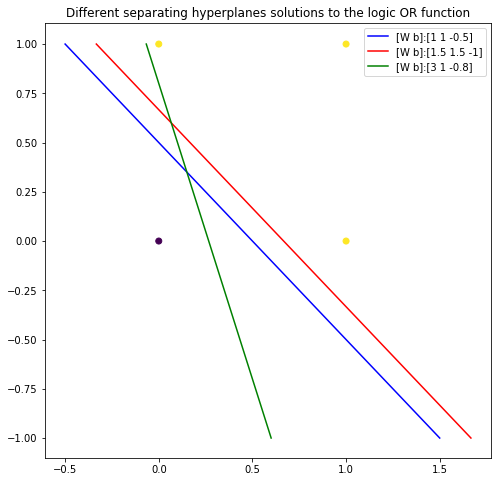

In [8]:
plt.rcParams['figure.figsize'] = [8, 8]

x_min = -1
x_max = 2

h = 1
xx = np.arange(x_min, x_max, h)

line_1_x1 = get_x1_boundary(W_final, b_final, xx) 
line_2_x1 = get_x1_boundary(W_2, b_2, xx) 
line_3_x1 = get_x1_boundary(W_3, b_3, xx) 
plt.scatter(X[:, 0], X[:, 1], c=y_OR)
plt.plot(line_1_x1,xx, c="blue")
plt.plot(line_2_x1,xx, c="red")
plt.plot(line_3_x1,xx, c="green")
plt.legend(['[W b]:['+ str(W_final[0])  + ' ' + str(W_final[1]) +  ' ' + str(b_final) + ']', 
           '[W b]:['+ str(W_2[0])  + ' ' + str(W_2[1]) + ' ' +  str(b_2) + ']', 
           '[W b]:['+ str(W_3[0])  + ' ' + str(W_3[1]) + ' ' +  str(b_3) + ']'] )
plt.title('Different separating hyperplanes solutions to the logic OR function')
plt.show()

**Question**: These are just examples. What are the general set of inequalities that must be satisfied for an OR perceptron?

### AND function
As with the OR function, lets try with different initialization values for $\mathbf{W}$. We will try the same ones we used for the OR.

In [9]:
#OR output
y_AND = [-1,-1,-1,1] 

#initialization
W = [0, 1]
b = 0.5

#Solve
[W_and_1, b_and_1] = perceptron_algorithm(X,y_AND,W,b)
print('Solution(W,b) : (', W_and_1, b_and_1, ')')

Initial weights (W,b): ( [0, 1] , 0.5 )
*************** Iteration No:  1 ************************
Sample 0  (x,y): ( [0 0] , -1 )
--> with activation: y*(dot(W,x) +b) =  -1 *( dot( [0, 1] , [0 0] ) +  0.5 )= -0.5
--> Updated weights:  [0 1]  and bias  -0.5
Sample 1  (x,y): ( [0 1] , -1 )
--> with activation: y*(dot(W,x) +b) =  -1 *( dot( [0 1] , [0 1] ) +  -0.5 )= -0.5
--> Updated weights:  [0 0]  and bias  -1.5
Sample 2  (x,y): ( [1 0] , -1 )
--> with activation: y*(dot(W,x) +b) =  -1 *( dot( [0 0] , [1 0] ) +  -1.5 )= 1.5
--> Activation positive: No updates
Sample 3  (x,y): ( [1 1] , 1 )
--> with activation: y*(dot(W,x) +b) =  1 *( dot( [0 0] , [1 1] ) +  -1.5 )= -1.5
--> Updated weights:  [1 1]  and bias  -0.5
*************** Iteration No:  2 ************************
Sample 0  (x,y): ( [0 0] , -1 )
--> with activation: y*(dot(W,x) +b) =  -1 *( dot( [1 1] , [0 0] ) +  -0.5 )= 0.5
--> Activation positive: No updates
Sample 1  (x,y): ( [0 1] , -1 )
--> with activation: y*(dot(W,x) +b) 

In [10]:
W = [0.5, 0.5]
b = 1

#Solve
[W_and_2, b_and_2] = perceptron_algorithm(X,y_AND,W,b)
print('Solution(W,b) : (', W_and_2, b_and_2, ')')


print('****************************************************************')
print('****************************************************************')
print('****************************************************************')
W = [3, 1]
b = 0.2
[W_and_3, b_and_3] = perceptron_algorithm(X,y_AND,W,b)
print('Solution(W,b) : (', W_and_3, b_and_3, ')')

Initial weights (W,b): ( [0.5, 0.5] , 1 )
*************** Iteration No:  1 ************************
Sample 0  (x,y): ( [0 0] , -1 )
--> with activation: y*(dot(W,x) +b) =  -1 *( dot( [0.5, 0.5] , [0 0] ) +  1 )= -1.0
--> Updated weights:  [0.5 0.5]  and bias  0
Sample 1  (x,y): ( [0 1] , -1 )
--> with activation: y*(dot(W,x) +b) =  -1 *( dot( [0.5 0.5] , [0 1] ) +  0 )= -0.5
--> Updated weights:  [ 0.5 -0.5]  and bias  -1
Sample 2  (x,y): ( [1 0] , -1 )
--> with activation: y*(dot(W,x) +b) =  -1 *( dot( [ 0.5 -0.5] , [1 0] ) +  -1 )= 0.5
--> Activation positive: No updates
Sample 3  (x,y): ( [1 1] , 1 )
--> with activation: y*(dot(W,x) +b) =  1 *( dot( [ 0.5 -0.5] , [1 1] ) +  -1 )= -1.0
--> Updated weights:  [1.5 0.5]  and bias  0
*************** Iteration No:  2 ************************
Sample 0  (x,y): ( [0 0] , -1 )
--> with activation: y*(dot(W,x) +b) =  -1 *( dot( [1.5 0.5] , [0 0] ) +  0 )= -0.0
--> Updated weights:  [1.5 0.5]  and bias  -1
Sample 1  (x,y): ( [0 1] , -1 )
--> wi

And as before, lets plot the results

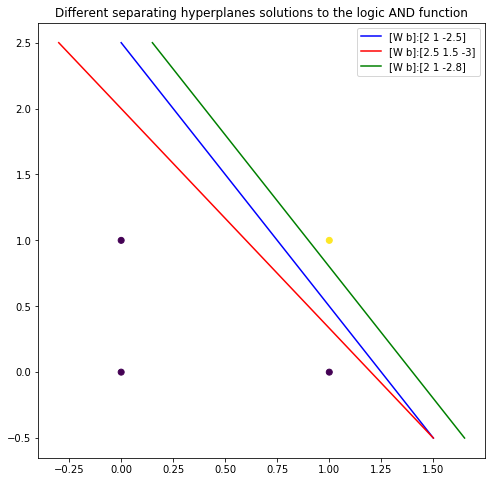

In [11]:
x_min = -0.5
x_max = 3

h = 1
xx = np.arange(x_min, x_max, h)

line_1_x1 = get_x1_boundary(W_and_1, b_and_1, xx) 
line_2_x1 = get_x1_boundary(W_and_2, b_and_2, xx) 
line_3_x1 = get_x1_boundary(W_and_3, b_and_3, xx) 
plt.scatter(X[:, 0], X[:, 1], c=y_AND)
plt.plot(line_1_x1,xx, c="blue")
plt.plot(line_2_x1,xx, c="red")
plt.plot(line_3_x1,xx, c="green")
plt.legend(['[W b]:['+ str(W_and_1[0])  + ' ' + str(W_and_1[1]) +  ' ' + str(b_and_1) + ']', 
           '[W b]:['+ str(W_and_2[0])  + ' ' + str(W_and_2[1]) + ' ' +  str(b_and_2) + ']', 
           '[W b]:['+ str(W_and_3[0])  + ' ' + str(W_and_3[1]) + ' ' +  str(b_and_3) + ']'] )
plt.title('Different separating hyperplanes solutions to the logic AND function')
plt.show()

**Question**: These are just examples. What are the general set of inequalities that must be satisfied for an AND perceptron?

### NOT function
Lets see how this works in a simpler function.

In [12]:
y_NOT = [-1,1] 
X_not = np.array([0, 1]).reshape(2,1)

#initialization
W = [0]
b = 0.5

#Solve 1: 
[W_and_1, b_and_1] = perceptron_algorithm(X_not,y_NOT,W,b)
print('Solution(W,b) : (', W_and_1, b_and_1, ')')

print('****************************************************************')
print('****************************************************************')
print('*******************Second intialization ************************')
W = [1]
b = 1

#Solve 2:
[W_and_2, b_and_2] = perceptron_algorithm(X_not,y_NOT,W,b)
print('Solution(W,b) : (', W_and_2, b_and_2, ')')

#Solve 3:
print('****************************************************************')
print('****************************************************************')
print('******************* Third intialization ************************')
W = [3]
b = 0.2
[W_and_3, b_and_3] = perceptron_algorithm(X_not,y_NOT,W,b)
print('Solution(W,b) : (', W_and_3, b_and_3, ')')

Initial weights (W,b): ( [0] , 0.5 )
*************** Iteration No:  1 ************************
Sample 0  (x,y): ( [0] , -1 )
--> with activation: y*(dot(W,x) +b) =  -1 *( dot( [0] , [0] ) +  0.5 )= -0.5
--> Updated weights:  [0]  and bias  -0.5
Sample 1  (x,y): ( [1] , 1 )
--> with activation: y*(dot(W,x) +b) =  1 *( dot( [0] , [1] ) +  -0.5 )= -0.5
--> Updated weights:  [1]  and bias  0.5
*************** Iteration No:  2 ************************
Sample 0  (x,y): ( [0] , -1 )
--> with activation: y*(dot(W,x) +b) =  -1 *( dot( [1] , [0] ) +  0.5 )= -0.5
--> Updated weights:  [1]  and bias  -0.5
Sample 1  (x,y): ( [1] , 1 )
--> with activation: y*(dot(W,x) +b) =  1 *( dot( [1] , [1] ) +  -0.5 )= 0.5
--> Activation positive: No updates
*************** Iteration No:  3 ************************
Sample 0  (x,y): ( [0] , -1 )
--> with activation: y*(dot(W,x) +b) =  -1 *( dot( [1] , [0] ) +  -0.5 )= 0.5
--> Activation positive: No updates
Sample 1  (x,y): ( [1] , 1 )
--> with activation: y*(do

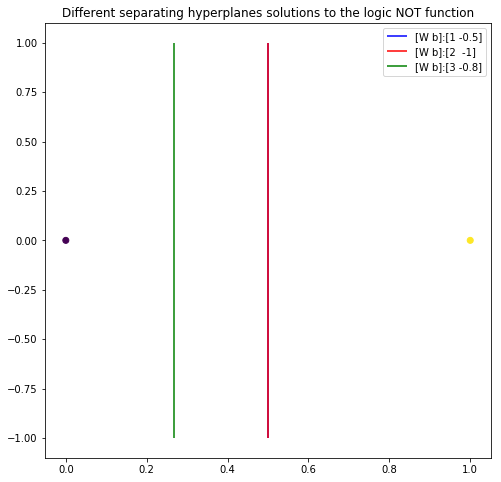

In [13]:
x_min = -1
x_max = 1


plt.vlines(-b_and_1/W_and_1[0],x_min, x_max, colors='blue')
plt.vlines(-b_and_2/W_and_2[0],x_min, x_max, colors='red')
plt.vlines(-b_and_3/W_and_3[0],x_min, x_max, colors='green')
plt.scatter(X_not, [0, 0], c=y_NOT)

plt.legend(['[W b]:['+ str(W_and_1[0])  + ' '  + str(b_and_1) + ']', 
           '[W b]:['+ str(W_and_2[0])  + ' ' + ' ' +  str(b_and_2) + ']', 
           '[W b]:['+ str(W_and_3[0])  + ' ' + str(b_and_3) + ']'] )

plt.title('Different separating hyperplanes solutions to the logic NOT function')
plt.show()